## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single Lego block that has ever been built and especially Star Wars year 1999</p>
<p><img src="https://www.lego.com/cdn/cs/set/assets/blt2e698545667a8111/75333.png" alt="lego"></p>

In [136]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*K6eVJE-TFL2VAJe2BzKJAQ.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of Lego sets!</p>

In [137]:
# Import pandas
import pandas as pd

# Read colors data
colors = pd.read_csv("datasets/colors.csv")

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [138]:
# How many distinct colors are available?
num_col = colors['rgb'].nunique()
# Print num_colors
print("Number of distinct colors:", num_col)


Number of distinct colors: 124


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [139]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby("is_trans").count()
colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

<AxesSubplot: xlabel='year'>

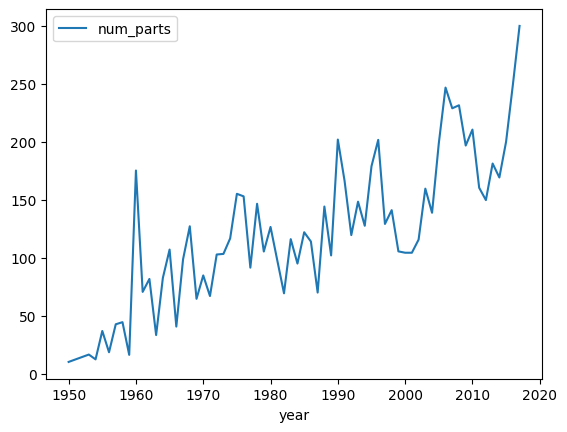

In [140]:
%matplotlib inline
# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets[['year', 'num_parts']].groupby('year').mean()

# Plot trends in average number of parts by year
parts_by_year.plot()

## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [141]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets.groupby('year')[['theme_id']].nunique()

#themes_by_year = sets.groupby('year')['theme_id'].nunique().reset_index()



themes_by_year.head()

,theme_id
year,
1950,2
1953,1
1954,2
1955,4
1956,3


## 7. Star Wars Year!
<p>In 1999, Lego expanded into licensed sets with the introduction of Star Wars themed sets. In that year, how many unique themes were released?

</p>

In [142]:
# Get the number of unique themes released in 1999
starwars_year = themes_by_year.loc[1999,'theme_id'] 

# Print the number of unique themes released in 1999
print(starwars_year)

71


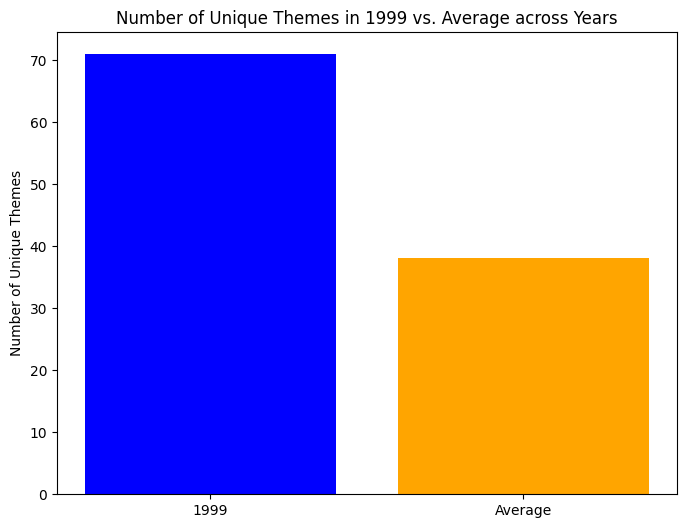

In [143]:
import matplotlib.pyplot as plt

# Calculate the number of unique themes per year for all years
themes_by_year = sets.groupby('year')['theme_id'].nunique()

# Get the number of unique themes for 1999
unique_themes_1999 = themes_by_year.loc[1999]

# Calculate the average or median number of unique themes across all years
average_unique_themes = themes_by_year.mean()  # or themes_by_year.median()

# Create a bar plot comparing 1999 with average/median
plt.figure(figsize=(8, 6))
plt.bar(['1999', 'Average'], [unique_themes_1999, average_unique_themes], color=['blue', 'orange'])
plt.title('Number of Unique Themes in 1999 vs. Average across Years')
plt.ylabel('Number of Unique Themes')
plt.show()



## 8. Wrapping It All Up!
<p>1999 was a big year for Lego with the Star Wars release, but it's just a piece of the puzzle. Looking ahead, Lego's production skyrocketed in the following years. Surprisingly, 1998 had more themes than '99, sparking curiosity about what really boosted production. Star Wars was a hit, no doubt, but Lego's success might have deeper roots than just that iconic year.

</p>

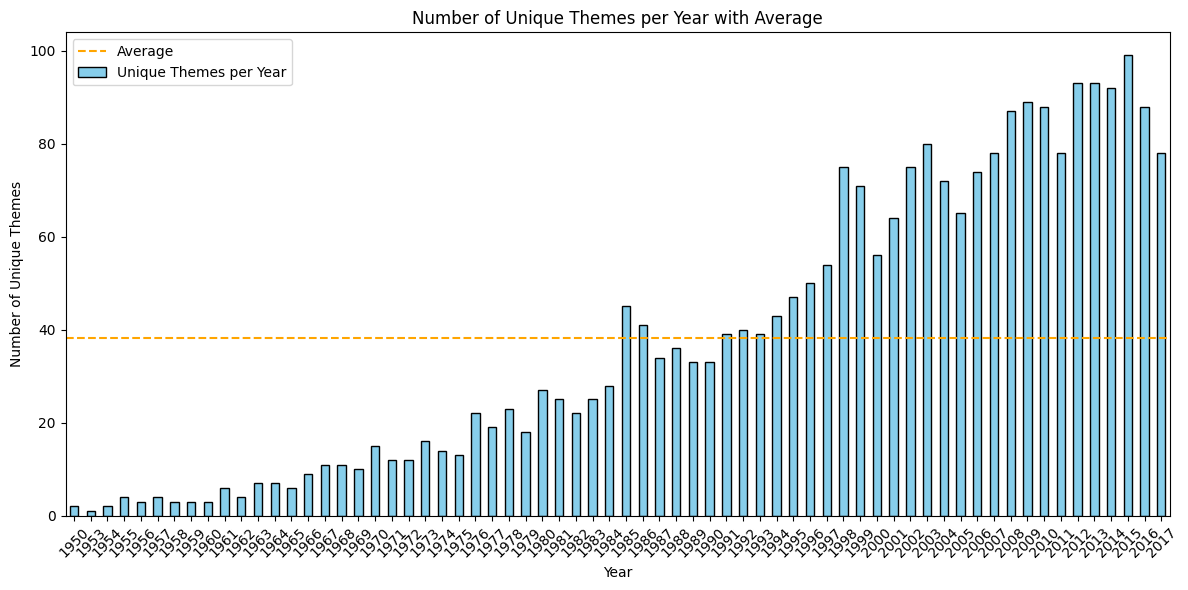

In [144]:
import matplotlib.pyplot as plt

# Calculate the number of unique themes per year for all years
themes_by_year = sets.groupby('year')['theme_id'].nunique()

# Calculate the average number of unique themes across all years
average_unique_themes = themes_by_year.mean()

# Plotting a bar chart for the number of unique themes per year with an average line
plt.figure(figsize=(12, 6))

# Plotting bars for unique themes per year
themes_by_year.plot(kind='bar', color='skyblue', edgecolor='black', label='Unique Themes per Year')

# Adding a dashed line for the average
plt.axhline(y=average_unique_themes, color='orange', linestyle='--', label='Average')

# Title and labels for the chart
plt.title('Number of Unique Themes per Year with Average')
plt.xlabel('Year')
plt.ylabel('Number of Unique Themes')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying legend and ensuring proper layout
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
